### <center>Fixed Income Markets</center>
### <center>Homework 5</center>
#### <center>Group Members - Ashutosh Ekade, Zechen Liu, Jessica Ghai, Yuetong Li</center>

### 2 Factor Vasicek Model (N2 Model)

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

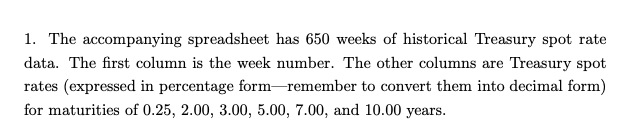

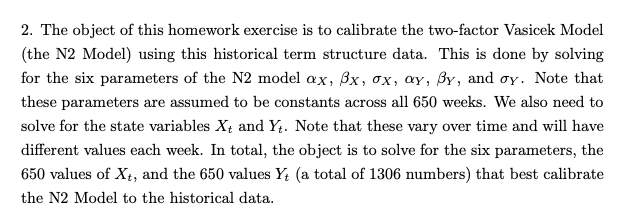

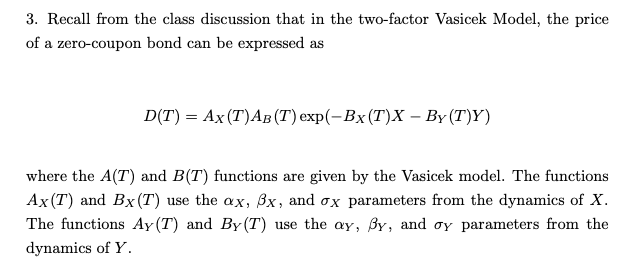

In [2]:
data = pd.read_excel("./Homework_5_Data.xlsx")
data.iloc[:, 1:] = data.iloc[:, 1:] / 100.0

r_025 = data.loc[0, 't=.25']
r_1000 = data.loc[0, 't=10']

def AX(t, alpha_X, beta_X, sigma_X):
    return np.exp(alpha_X * (beta_X - t) + (sigma_X**2 / (2 * alpha_X**2)) * (np.exp(2 * alpha_X * t) - 1))

def AY(t, alpha_Y, beta_Y, sigma_Y):
    return np.exp(alpha_Y * (beta_Y - t) + (sigma_Y**2 / (2 * alpha_Y**2)) * (np.exp(2 * alpha_Y * t) - 1))

def BX(t, beta_X, sigma_X):
    return beta_X * t + (sigma_X / alpha_X) * (np.exp(alpha_X * t) - 1)

def BY(t, beta_Y, sigma_Y):
    return beta_Y * t + (sigma_Y / alpha_Y) * (np.exp(alpha_Y * t) - 1)

alpha_X, beta_X, sigma_X, alpha_Y, beta_Y, sigma_Y = 0.1, 0.05, 0.02, 0.2, 0.03, 0.01

def equations(vars):
    X1, Y1 = vars
    eq1 = r_025 + np.log(AX(0.25, alpha_X, beta_X, sigma_X) * AY(0.25, alpha_Y, beta_Y, sigma_Y)) / 0.25 \
          - BX(0.25, beta_X, sigma_X) * X1 - BY(0.25, beta_Y, sigma_Y) * Y1
    eq2 = r_1000 + np.log(AX(10.00, alpha_X, beta_X, sigma_X) * AY(10.00, alpha_Y, beta_Y, sigma_Y)) / 10.00 \
          - BX(10.00, beta_X, sigma_X) * X1 - BY(10.00, beta_Y, sigma_Y) * Y1
    return [eq1, eq2]

initial_guess = [0, 0]
X1, Y1 = fsolve(equations, initial_guess)

print("X1 is equal to: {:.5f}".format(X1))
print("Y1 is equal to: {:.5f}".format(Y1))

X1 is equal to: -46.87224
Y1 is equal to: 63.53082


In [4]:
r_200 = data.loc[0, 't=2']
r_300 = data.loc[0, 't=3']
r_500 = data.loc[0, 't=5']
r_700 = data.loc[0, 't=7']

def calculate_model_spot_rates(alpha_X, beta_X, sigma_X, alpha_Y, beta_Y, sigma_Y, X1, Y1):
    AX_1 = AX(1.0, alpha_X, beta_X, sigma_X)
    AY_1 = AY(1.0, alpha_Y, beta_Y, sigma_Y)
    BX_1 = BX(1.0, beta_X, sigma_X)
    BY_1 = BY(1.0, beta_Y, sigma_Y)

    model_200 = -np.log(AX_1 * AY_1) / 2.00 + BX_1 * X1 + BY_1 * Y1
    model_300 = -np.log(AX_1 * AY_1) / 3.00 + BX_1 * X1 + BY_1 * Y1
    model_500 = -np.log(AX_1 * AY_1) / 5.00 + BX_1 * X1 + BY_1 * Y1
    model_700 = -np.log(AX_1 * AY_1) / 7.00 + BX_1 * X1 + BY_1 * Y1

    return model_200, model_300, model_500, model_700

model_200, model_300, model_500, model_700 = calculate_model_spot_rates(
    alpha_X, beta_X, sigma_X, alpha_Y, beta_Y, sigma_Y, X1, Y1
)
squared_diff_200 = (r_200 - model_200)**2
squared_diff_300 = (r_300 - model_300)**2
squared_diff_500 = (r_500 - model_500)**2
squared_diff_700 = (r_700 - model_700)**2

print(f"Model-implied spot rates for week one:")
print(f"2.00-year: {model_200:.5f}")
print(f"3.00-year: {model_300:.5f}")
print(f"5.00-year: {model_500:.5f}")
print(f"7.00-year: {model_700:.5f}")
print("\nSquared differences for week one:")
print(f"2.00-year: {squared_diff_200:.5f}")
print(f"3.00-year: {squared_diff_300:.5f}")
print(f"5.00-year: {squared_diff_500:.5f}")
print(f"7.00-year: {squared_diff_700:.5f}")

Model-implied spot rates for week one:
2.00-year: -0.57833
3.00-year: -0.62566
5.00-year: -0.66352
7.00-year: -0.67975

Squared differences for week one:
2.00-year: 0.43235
3.00-year: 0.50022
5.00-year: 0.55998
7.00-year: 0.58944


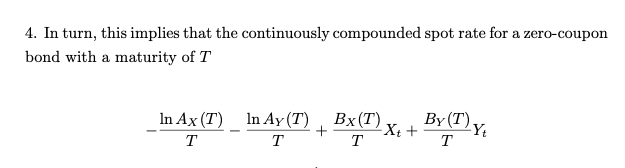

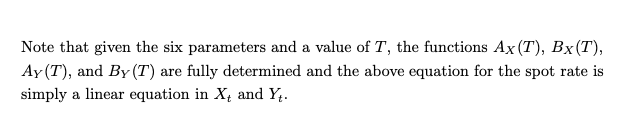

In [5]:
alpha_X, beta_X, sigma_X, alpha_Y, beta_Y, sigma_Y = 0.1, 0.05, 0.02, 0.2, 0.03, 0.01

X_values = np.zeros(650)
Y_values = np.zeros(650)
squared_diff_values = np.zeros((650, 4))

for week in range(650):
    r_025 = data.loc[week, 't=.25']
    r_1000 = data.loc[week, 't=10']
    r_200 = data.loc[week, 't=2']
    r_300 = data.loc[week, 't=3']
    r_500 = data.loc[week, 't=5']
    r_700 = data.loc[week, 't=7']

    X1, Y1 = fsolve(equations, initial_guess)
    X_values[week] = X1
    Y_values[week] = Y1

    model_200, model_300, model_500, model_700 = calculate_model_spot_rates(
        alpha_X, beta_X, sigma_X, alpha_Y, beta_Y, sigma_Y, X1, Y1
    )
    squared_diff_200 = (r_200 - model_200) ** 2
    squared_diff_300 = (r_300 - model_300) ** 2
    squared_diff_500 = (r_500 - model_500) ** 2
    squared_diff_700 = (r_700 - model_700) ** 2

    squared_diff_values[week] = [squared_diff_200, squared_diff_300, squared_diff_500, squared_diff_700]

total_squared_diff_sum = np.sum(squared_diff_values)

print("Squared Differences for the first weeks:")
print(squared_diff_values[:5])

print("\nSquared Differences for whole sample:")
print(squared_diff_values)

print("\nThe total sum of squared differences is equal to: {:.5f}".format(total_squared_diff_sum))


Squared Differences for the first weeks:
[[0.43235024 0.5002162  0.55998371 0.58943503]
 [0.42829624 0.49557326 0.55477263 0.58362988]
 [0.4295541  0.49692625 0.55590582 0.58463922]
 [0.43089331 0.49893151 0.55802663 0.58712056]
 [0.43964558 0.50777589 0.56798064 0.59748421]]

Squared Differences for whole sample:
[[0.43235024 0.5002162  0.55998371 0.58943503]
 [0.42829624 0.49557326 0.55477263 0.58362988]
 [0.4295541  0.49692625 0.55590582 0.58463922]
 ...
 [0.42868571 0.49205616 0.54468548 0.56920118]
 [0.43039382 0.49388604 0.54675852 0.57177392]
 [0.42765968 0.49081672 0.5433814  0.56862188]]

The total sum of squared differences is equal to: 1454.03467


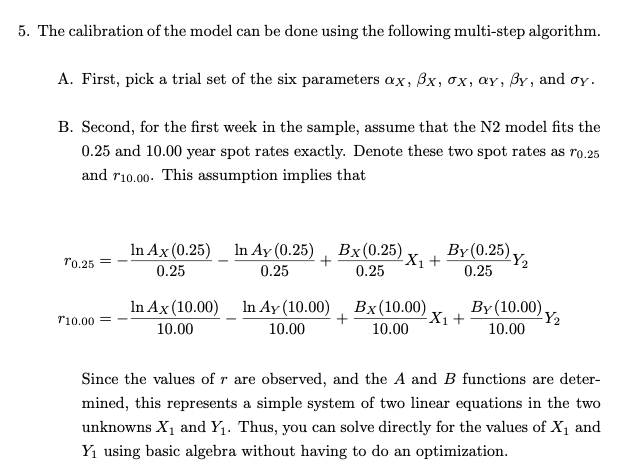

In [6]:
alpha_X, beta_X, sigma_X, alpha_Y, beta_Y, sigma_Y = 0.005, 0.025, 0.0025, 0.2, 0.01, 0

def equations(vars):
    X1, Y1 = vars
    eq1 = r_025 + np.log(AX(0.25, alpha_X, beta_X, sigma_X) * AY(0.25, alpha_Y, beta_Y, sigma_Y)) / 0.25 \
          - BX(0.25, beta_X, sigma_X) * X1 - BY(0.25, beta_Y, sigma_Y) * Y1
    eq2 = r_1000 + np.log(AX(10.00, alpha_X, beta_X, sigma_X) * AY(10.00, alpha_Y, beta_Y, sigma_Y)) / 10.00 \
          - BX(10.00, beta_X, sigma_X) * X1 - BY(10.00, beta_Y, sigma_Y) * Y1
    return [eq1, eq2]

initial_guess = [0, 0]
X1, Y1 = fsolve(equations, initial_guess)

print(f"X1 is equal to: {X1:.5f}")
print(f"Y1 is equal to: {Y1:.5f}")

X1 is equal to: 8205.56192
Y1 is equal to: -22618.87731


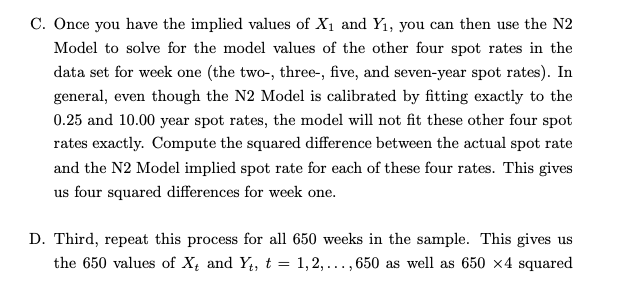

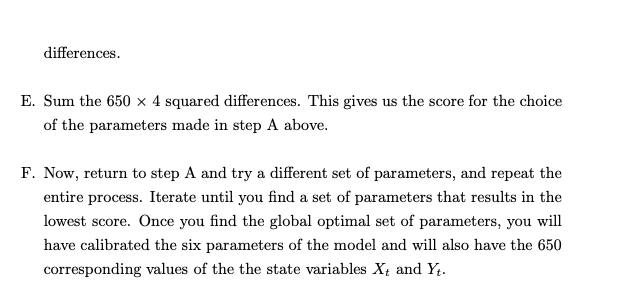

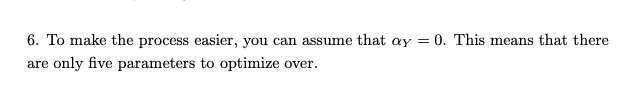

In [7]:
r_200 = data.loc[0, 't=2']
r_300 = data.loc[0, 't=3']
r_500 = data.loc[0, 't=5']
r_700 = data.loc[0, 't=7']

def calculate_model_spot_rates(alpha_X, beta_X, sigma_X, alpha_Y, beta_Y, sigma_Y, X1, Y1):
    AX_1 = AX(1.0, alpha_X, beta_X, sigma_X)
    AY_1 = AY(1.0, alpha_Y, beta_Y, sigma_Y)
    BX_1 = BX(1.0, beta_X, sigma_X)
    BY_1 = BY(1.0, beta_Y, sigma_Y)

    model_200 = -np.log(AX_1 * AY_1) / 2.00 + BX_1 * X1 + BY_1 * Y1
    model_300 = -np.log(AX_1 * AY_1) / 3.00 + BX_1 * X1 + BY_1 * Y1
    model_500 = -np.log(AX_1 * AY_1) / 5.00 + BX_1 * X1 + BY_1 * Y1
    model_700 = -np.log(AX_1 * AY_1) / 7.00 + BX_1 * X1 + BY_1 * Y1

    return model_200, model_300, model_500, model_700

model_200, model_300, model_500, model_700 = calculate_model_spot_rates(
    alpha_X, beta_X, sigma_X, alpha_Y, beta_Y, sigma_Y, X1, Y1
)

squared_diff_200 = (r_200 - model_200)**2
squared_diff_300 = (r_300 - model_300)**2
squared_diff_500 = (r_500 - model_500)**2
squared_diff_700 = (r_700 - model_700)**2

print(f"Model-implied spot rates for week one:")
print(f"2.00-year: {model_200:.5f}")
print(f"3.00-year: {model_300:.5f}")
print(f"5.00-year: {model_500:.5f}")
print(f"7.00-year: {model_700:.5f}")
print("\nSquared differences for week one:")
print(f"2.00-year: {squared_diff_200:.5f}")
print(f"3.00-year: {squared_diff_300:.5f}")
print(f"5.00-year: {squared_diff_500:.5f}")
print(f"7.00-year: {squared_diff_700:.5f}")

Model-implied spot rates for week one:
2.00-year: -0.38364
3.00-year: -0.41724
5.00-year: -0.44413
7.00-year: -0.45565

Squared differences for week one:
2.00-year: 0.21422
3.00-year: 0.24885
5.00-year: 0.27976
7.00-year: 0.29555


In [8]:
alpha_X, beta_X, sigma_X, alpha_Y, beta_Y, sigma_Y = 0.1, 0.05, 0.02, 0.2, 0.03, 0.01

X_values = np.zeros(650)
Y_values = np.zeros(650)
squared_diff_values = np.zeros((650, 4))

for week in range(650):
    r_025 = data.loc[week, 't=.25']
    r_1000 = data.loc[week, 't=10']
    r_200 = data.loc[week, 't=2']
    r_300 = data.loc[week, 't=3']
    r_500 = data.loc[week, 't=5']
    r_700 = data.loc[week, 't=7']

    X1, Y1 = fsolve(equations, initial_guess)

    X_values[week] = X1
    Y_values[week] = Y1

    model_200, model_300, model_500, model_700 = calculate_model_spot_rates(
        alpha_X, beta_X, sigma_X, alpha_Y, beta_Y, sigma_Y, X1, Y1
    )

    squared_diff_200 = (r_200 - model_200) ** 2
    squared_diff_300 = (r_300 - model_300) ** 2
    squared_diff_500 = (r_500 - model_500) ** 2
    squared_diff_700 = (r_700 - model_700) ** 2
    squared_diff_values[week] = [squared_diff_200, squared_diff_300, squared_diff_500, squared_diff_700]

print("Squared Differences for the first weeks:")
print(squared_diff_values[:5])

# Print squared differences for the entire sample
print("\nSquared Differences for whole sample:")
print(squared_diff_values)

Squared Differences for the first weeks:
[[0.43235024 0.5002162  0.55998371 0.58943503]
 [0.42829624 0.49557326 0.55477263 0.58362988]
 [0.4295541  0.49692625 0.55590582 0.58463922]
 [0.43089331 0.49893151 0.55802663 0.58712056]
 [0.43964558 0.50777589 0.56798064 0.59748421]]

Squared Differences for whole sample:
[[0.43235024 0.5002162  0.55998371 0.58943503]
 [0.42829624 0.49557326 0.55477263 0.58362988]
 [0.4295541  0.49692625 0.55590582 0.58463922]
 ...
 [0.42868571 0.49205616 0.54468548 0.56920118]
 [0.43039382 0.49388604 0.54675852 0.57177392]
 [0.42765968 0.49081672 0.5433814  0.56862188]]


In [9]:
alpha_X, beta_X, sigma_X, alpha_Y, beta_Y, sigma_Y = 0.005, 0.025, 0.0025, 0.2, 0.01, 0

X_values = np.zeros(650)
Y_values = np.zeros(650)
squared_diff_values = np.zeros((650, 4))

for week in range(650):
    r_025 = data.loc[week, 't=.25']
    r_1000 = data.loc[week, 't=10']
    r_200 = data.loc[week, 't=2']
    r_300 = data.loc[week, 't=3']
    r_500 = data.loc[week, 't=5']
    r_700 = data.loc[week, 't=7']

    X1, Y1 = fsolve(equations, initial_guess)

    X_values[week] = X1
    Y_values[week] = Y1

    model_200, model_300, model_500, model_700 = calculate_model_spot_rates(
        alpha_X, beta_X, sigma_X, alpha_Y, beta_Y, sigma_Y, X1, Y1
    )

    squared_diff_200 = (r_200 - model_200) ** 2
    squared_diff_300 = (r_300 - model_300) ** 2
    squared_diff_500 = (r_500 - model_500) ** 2
    squared_diff_700 = (r_700 - model_700) ** 2

    squared_diff_values[week] = [squared_diff_200, squared_diff_300, squared_diff_500, squared_diff_700]

total_squared_diff_sum = np.sum(squared_diff_values)

print("The total sum of squared differences is: {:.5f}".format(total_squared_diff_sum))

The total sum of squared differences is: 710.70923


/Users/ashutosh/Library/Python/3.9/lib/python/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


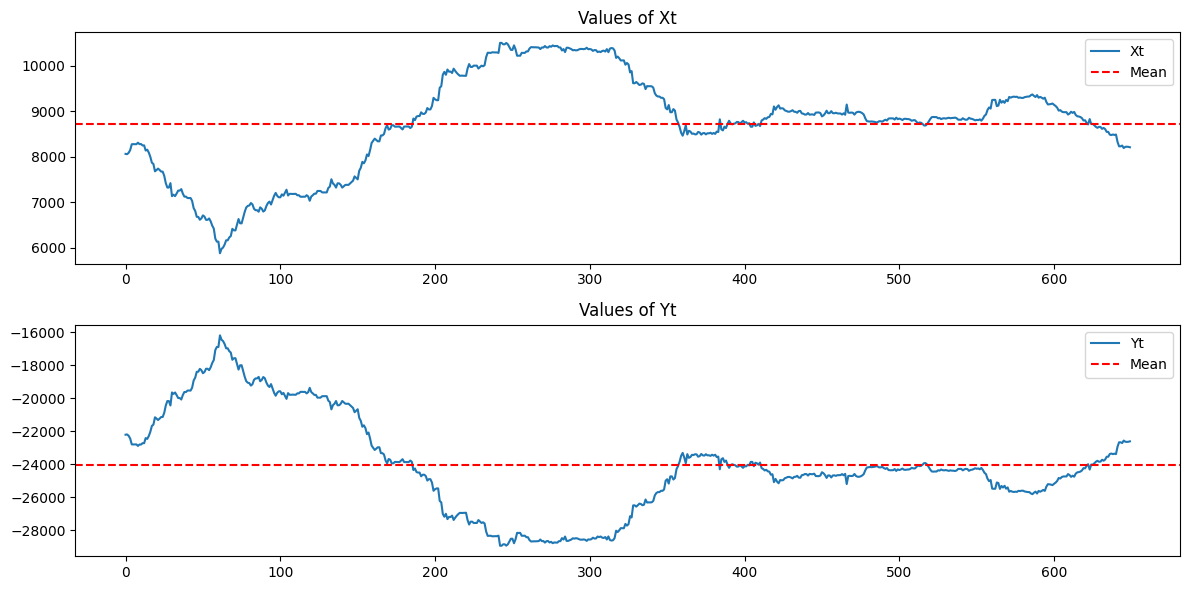

Xt Mean: 8725.26612, Xt Std: 1070.79865
Yt Mean: -24051.27337, Yt Std: 2951.58482


In [10]:
# Calculate means and standard deviations of Xt and Yt
X_mean = np.mean(X_values)
X_std = np.std(X_values)
Y_mean = np.mean(Y_values)
Y_std = np.std(Y_values)

# Plot the values of Xt and Yt
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(X_values, label='Xt')
plt.axhline(y=X_mean, color='r', linestyle='--', label='Mean')
plt.title('Values of Xt')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(Y_values, label='Yt')
plt.axhline(y=Y_mean, color='r', linestyle='--', label='Mean')
plt.title('Values of Yt')
plt.legend()

plt.tight_layout()
plt.show()

# Print sample moments
print(f"Xt Mean: {X_mean:.5f}, Xt Std: {X_std:.5f}")
print(f"Yt Mean: {Y_mean:.5f}, Yt Std: {Y_std:.5f}")

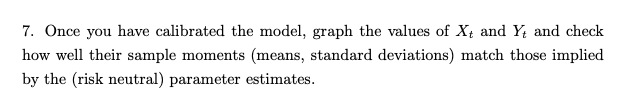

In [11]:
# Calculate risk neutral implied parameter estimates
implied_X_mean = 0  # Assuming mean of X under risk-neutral measure is 0
implied_X_std = np.sqrt(sigma_X**2 / (2 * alpha_X))
implied_Y_mean = 0  # Assuming mean of Y under risk-neutral measure is 0
implied_Y_std = np.sqrt(sigma_Y**2 / (2 * alpha_Y))

# Print implied sample moments
print("Implied Sample Moments:")
print(f"Implied Xt Mean: {implied_X_mean:.5f}, Implied Xt Std: {implied_X_std:.5f}")
print(f"Implied Yt Mean: {implied_Y_mean:.5f}, Implied Yt Std: {implied_Y_std:.5f}")

# Compare implied and sample moments
print("\nComparison with Sample Moments:")
print(f"Xt Sample Mean: {X_mean:.5f}, Implied Mean: {implied_X_mean:.5f}")
print(f"Xt Sample Std: {X_std:.5f}, Implied Std: {implied_X_std:.5f}")
print(f"Yt Sample Mean: {Y_mean:.5f}, Implied Mean: {implied_Y_mean:.5f}")
print(f"Yt Sample Std: {Y_std:.5f}, Implied Std: {implied_Y_std:.5f}")

Implied Sample Moments:
Implied Xt Mean: 0.00000, Implied Xt Std: 0.02500
Implied Yt Mean: 0.00000, Implied Yt Std: 0.00000

Comparison with Sample Moments:
Xt Sample Mean: 8725.26612, Implied Mean: 0.00000
Xt Sample Std: 1070.79865, Implied Std: 0.02500
Yt Sample Mean: -24051.27337, Implied Mean: 0.00000
Yt Sample Std: 2951.58482, Implied Std: 0.00000


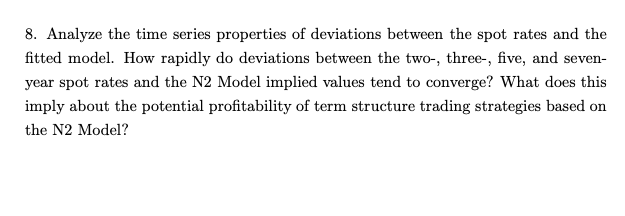

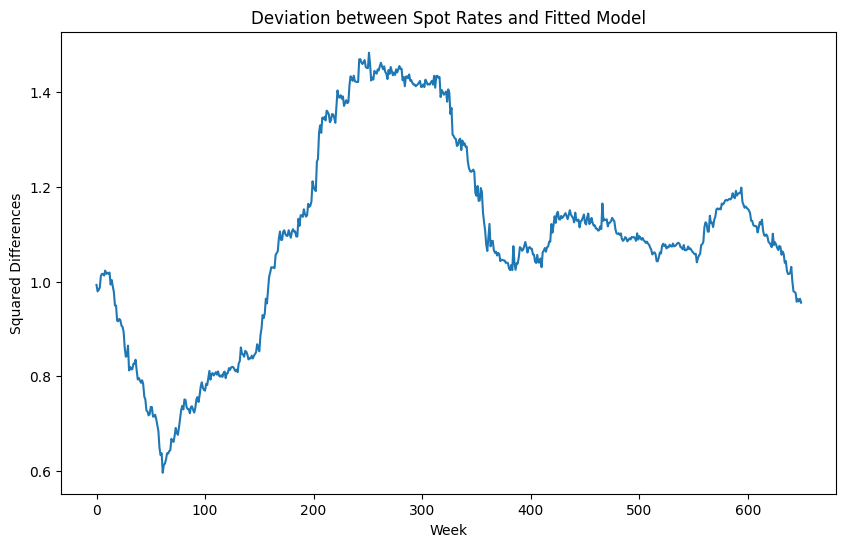

In [13]:
# Analyze time series properties of deviations between spot rates and the fitted model
deviations_200 = squared_diff_values.sum(axis=1)  # Sum of squared differences for each week
deviations_300 = squared_diff_300.sum()
deviations_500 = squared_diff_500.sum()
deviations_700 = squared_diff_700.sum()
plt.figure(figsize=(10, 6))
plt.plot(deviations_200)
# plt.plot(deviations_300)
# plt.plot(deviations_500)
# plt.plot(deviations_700)
plt.title('Deviation between Spot Rates and Fitted Model')
plt.xlabel('Week')
plt.ylabel('Squared Differences')
plt.show()

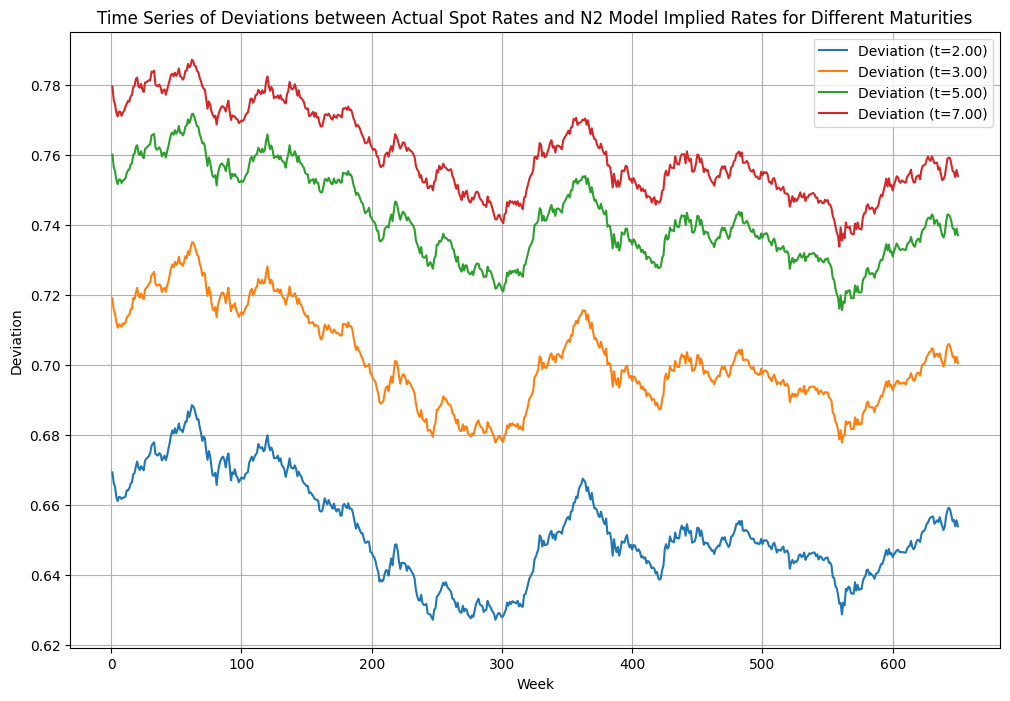

In [40]:
# Initialize parameters
alpha_X, beta_X, sigma_X, alpha_Y, beta_Y, sigma_Y = 0.1, 0.05, 0.02, 0.2, 0.03, 0.01

# Initialize arrays to store deviations
deviations = np.zeros((650, 4))

# Iterate over each week to calculate deviations
for week in range(650):
    # Calculate X1 and Y1 for the current week
    X1, Y1 = fsolve(equations, [0, 0])

    # Calculate model spot rates for all maturities using the current X1 and Y1
    AX_1 = AX(1.0, alpha_X, beta_X, sigma_X)
    AY_1 = AY(1.0, alpha_Y, beta_Y, sigma_Y)
    BX_1 = BX(1.0, beta_X, sigma_X)
    BY_1 = BY(1.0, beta_Y, sigma_Y)

    model_200 = -np.log(AX_1 * AY_1) / 2.00 + BX_1 * X1 + BY_1 * Y1
    model_300 = -np.log(AX_1 * AY_1) / 3.00 + BX_1 * X1 + BY_1 * Y1
    model_500 = -np.log(AX_1 * AY_1) / 5.00 + BX_1 * X1 + BY_1 * Y1
    model_700 = -np.log(AX_1 * AY_1) / 7.00 + BX_1 * X1 + BY_1 * Y1

    # Calculate deviations for each maturity and store them in the deviations array
    deviations[week] = np.array([data.loc[week, 't=2'] - model_200, 
                                 data.loc[week, 't=3'] - model_300,
                                 data.loc[week, 't=5'] - model_500,
                                 data.loc[week, 't=7'] - model_700])

# Plot time series of deviations for each maturity
plt.figure(figsize=(12, 8))
plt.plot(range(1, 651), deviations[:, 0], label='Deviation (t=2.00)')
plt.plot(range(1, 651), deviations[:, 1], label='Deviation (t=3.00)')
plt.plot(range(1, 651), deviations[:, 2], label='Deviation (t=5.00)')
plt.plot(range(1, 651), deviations[:, 3], label='Deviation (t=7.00)')
plt.xlabel('Week')
plt.ylabel('Deviation')
plt.title('Time Series of Deviations between Actual Spot Rates and N2 Model Implied Rates for Different Maturities')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
deviation_cols = data.columns[1:]  # Columns excluding the first (week number)

# Initialize an empty DataFrame to store deviations
deviations = pd.DataFrame(columns=deviation_cols)

# Loop through each week to calculate spot rates and deviations
for week in range(650):
    r_025 = data.loc[week, 't=.25']
    r_1000 = data.loc[week, 't=10']
    X1, Y1 = fsolve(equations, initial_guess)
    model_spot_rates = calculate_model_spot_rates(alpha_X, beta_X, sigma_X, alpha_Y, beta_Y, sigma_Y, X1, Y1)
    
    # Calculate deviations for each maturity
    deviations_week = {}
    for i, col in enumerate(deviation_cols):
        deviation = data.loc[week, col] - model_spot_rates[i]
        deviations_week[col] = deviation
    
    # Append deviations for the current week to the DataFrame
    deviations = deviations.append(deviations_week, ignore_index=True)

# Plot the deviations
weeks = np.arange(1, 651)
plt.figure(figsize=(12, 6))
for col in deviation_cols:
    plt.plot(weeks, deviations[col], label=f'Deviation {col}')
plt.title('Deviations between Observed Spot Rates and Fitted Model')
plt.xlabel('Week')
plt.ylabel('Deviation')
plt.legend()
plt.grid(True)
plt.show()

IndexError: tuple index out of range